In [2]:
import pandas as pd
import numpy as np
from datetime import date
import datetime as dt
import plotly.express as px 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode()
#from fbprophet import Prophet
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [3]:
from dask.distributed import Client
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import ParameterGrid

In [4]:
import itertools

In [5]:
train_data=pd.read_csv("train_algiers.csv",parse_dates=['date'])
test_data=pd.read_csv("test_algiers.csv",parse_dates=['date'])
train_data.head()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
0 2015-04-01                     0.0                    11.984259   
1 2015-04-02                     0.0                    12.426162   
2 2015-04-03                     0.0                    13.183237   
3 2015-04-04                     0.0                    12.117507   
4 2015-04-05                     0.0                    11.775280   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.007020                          79.653691   
1                           0.006639                          73.369087   
2                           0.007103                          73.648926   
3                           0.006628                          74.249417   
4                           0.006604                          75.414558   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                             -1.008622                             -1.247756   
1                             -0.882894                             -0.674852   
2                             -0.554821                             -0.975509   
3                             -0.762048                             -1.315288   
4                             -1.970064                             -1.730378   

   precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                             11.792043                     0.000000   
1                             10.580860                     0.000000   
2                             13.224449                     0.000000   
3                             11.899657                     0.000000   
4                             13.397951                     0.015292   

   ACond_tavg  ...  SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  \
0    0.023497  ...             0.0  290.359024        935.768881   
1    0.032284  ...             0.0  288.967108        933.417838   
2    0.021108  ...             0.0  289.621761        931.212514   
3    0.022526  ...             0.0  289.779312        929.087080   
4    0.027819  ...             0.0  289.759368        926.925510   

   SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
0         238.455282          4.762528       0.0  217.475818   0.000013   
1         236.761384          4.734760       0.0  214.612400   0.000010   
2         235.312021          4.710264       0.0  215.533733   0.000011   
3         234.026542          4.696759       0.0  202.458474   0.000009   
4         232.774424          4.638155       0.0  222.788846   0.000011   

     TWS_tavg  water_availability  
0  935.769155         -200.341947  
1  933.421715         -173.229781  
2  931.213284         -175.856488  
3  929.092368         -164.456208  
4  926.930220         -186.252044  

[5 rows x 33 columns]

In [12]:
df_pop=pd.read_csv("Algiers_Population_2015_2023.csv")

In [13]:
test_data.head()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
0 2022-01-01                     0.0                    14.362410   
1 2022-01-02                     0.0                    13.754120   
2 2022-01-03                     0.0                    13.007181   
3 2022-01-04                     0.0                    12.400852   
4 2022-01-05                     0.4                    11.651835   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.005930                          59.793684   
1                           0.005732                          59.988725   
2                           0.005865                          64.340447   
3                           0.005519                          62.652419   
4                           0.005592                          65.912025   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                              0.649728                             -0.129626   
1                              1.456428                             -0.439457   
2                              1.428484                             -0.409314   
3                              2.115176                             -0.380763   
4                              1.913405                             -0.568244   

   precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                             11.859802                     0.450822   
1                             11.737146                     0.411741   
2                             13.172519                     0.663236   
3                             12.382598                     0.260890   
4                             13.392617                     0.313993   

   ACond_tavg  ...  SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  \
0    0.009450  ...               0  286.788900        899.052530   
1    0.008960  ...               0  286.541410        898.045329   
2    0.008998  ...               0  286.935664        897.024039   
3    0.017794  ...               0  287.612572        895.738426   
4    0.065906  ...               0  286.317625        894.526057   

   SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
0         228.701979          4.636154         0   93.006431   0.000002   
1         228.424234          4.628034         0   95.277539   0.000002   
2         228.134524          4.619723         0   95.147285   0.000002   
3         227.580171          4.549587         0  101.400477   0.000003   
4         227.139445          4.626612         0   71.475149   0.000001   

     TWS_tavg  water_availability  
0  899.053248         -132.530627  
1  898.046216         -134.054294  
2  897.025475         -137.813533  
3  895.739475         -184.837768  
4  894.539133         -183.853834  

[5 rows x 33 columns]

In [14]:
test_data.shape

(545, 33)

In [15]:
train_data.tail()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
2445 2021-12-26                     0.4                    16.287671   
2446 2021-12-27                     0.0                    15.364401   
2447 2021-12-28                     0.0                    15.230325   
2448 2021-12-29                     0.0                    15.254436   
2449 2021-12-30                     0.0                    14.979386   

      specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
2445                           0.007353                          64.745201   
2446                           0.007059                          65.617104   
2447                           0.006617                          62.344394   
2448                           0.006148                          58.465583   
2449                           0.005950                          57.813201   

      u_component_of_wind_10m_above_ground  \
2445                              1.852457   
2446                              1.496906   
2447                              0.348704   
2448                              0.088050   
2449                              0.323049   

      v_component_of_wind_10m_above_ground  \
2445                              0.836797   
2446                              0.156879   
2447                              0.345577   
2448                              0.232945   
2449                              0.204321   

      precipitable_water_entire_atmosphere  total_precipitation_surface  \
2445                             16.381304                     0.087708   
2446                             14.250724                     0.231606   
2447                             13.050149                     0.273704   
2448                             12.067519                     0.432374   
2449                             11.322365                     0.361492   

      ACond_tavg  ...  SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  \
2445    0.042153  ...             0.0  289.566125        908.131341   
2446    0.050204  ...             0.0  290.714109        906.384284   
2447    0.048286  ...             0.0  289.951823        904.638046   
2448    0.020123  ...             0.0  288.470871        903.027242   
2449    0.008380  ...             0.0  286.934505        901.597083   

      SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
2445         232.290232          4.644942       0.0   51.195616   0.000002   
2446         231.410801          4.632657       0.0   79.304834   0.000003   
2447         230.570851          4.630495       0.0   89.754350   0.000003   
2448         229.897395          4.631897       0.0   94.172944   0.000003   
2449         229.424148          4.646380       0.0   96.763829   0.000003   

        TWS_tavg  water_availability  
2445  908.139406         -141.918384  
2446  906.386631         -163.010434  
2447  904.640572         -151.027623  
2448  903.028228         -142.100086  
2449  901.597861         -130.413898  

[5 rows x 33 columns]

In [16]:
train_data.shape

(2450, 33)

### *Calculations*(All in MLD)

Surface Water=300
Ground Water=215
Desalined Water=300
Total Loss in Percentage=0.3
Daily Water Demand PerCap =200 #lcd

Average Population=2731732


##### Daily Water Availability (MLD) = Daily Quantity Of Water Supplied - Water Demand
##### Water Demand (MLD) = Per-Capita Demand (lpcd) x Population
##### Daily Quantity Of Water Supplied = S + del S
##### del S (MLD) = Precipitation - Evapotranspiration - Surface Water Runoff


grossTargetSupply=SurfaceWater+GroundWater+DesalinatedWater
print(f'Gross target supply: {round(grossTargetSupply)} MLD')
NetWaterSupply = grossTargetSupply*(1-TotalLossPerc)
print(f'Net water supply: {round(NetWaterSupply)} MLD')

In [17]:
train_data['date'] = pd.to_datetime(train_data['date'],format="%y-%m-%d")

In [18]:
test_data['date'] = pd.to_datetime(test_data['date'],format="%y-%m-%d")

In [19]:
train_data1=train_data
test_data1=test_data

In [20]:
train_data1["dayofweek"]=train_data['date'].dt.dayofweek
test_data1["dayofweek"]=test_data['date'].dt.dayofweek

In [21]:
train_data1["month"]=train_data['date'].dt.month
test_data1["month"]=test_data['date'].dt.month

In [22]:
train_data1["year"]=train_data['date'].dt.year
test_data1["year"]=test_data['date'].dt.year

In [23]:
train_data1.head()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
0 2015-04-01                     0.0                    11.984259   
1 2015-04-02                     0.0                    12.426162   
2 2015-04-03                     0.0                    13.183237   
3 2015-04-04                     0.0                    12.117507   
4 2015-04-05                     0.0                    11.775280   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.007020                          79.653691   
1                           0.006639                          73.369087   
2                           0.007103                          73.648926   
3                           0.006628                          74.249417   
4                           0.006604                          75.414558   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                             -1.008622                             -1.247756   
1                             -0.882894                             -0.674852   
2                             -0.554821                             -0.975509   
3                             -0.762048                             -1.315288   
4                             -1.970064                             -1.730378   

   precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                             11.792043                     0.000000   
1                             10.580860                     0.000000   
2                             13.224449                     0.000000   
3                             11.899657                     0.000000   
4                             13.397951                     0.015292   

   ACond_tavg  ...  SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  \
0    0.023497  ...         238.455282          4.762528       0.0  217.475818   
1    0.032284  ...         236.761384          4.734760       0.0  214.612400   
2    0.021108  ...         235.312021          4.710264       0.0  215.533733   
3    0.022526  ...         234.026542          4.696759       0.0  202.458474   
4    0.027819  ...         232.774424          4.638155       0.0  222.788846   

   TVeg_tavg    TWS_tavg  water_availability  dayofweek  month  year  
0   0.000013  935.769155         -200.341947          2      4  2015  
1   0.000010  933.421715         -173.229781          3      4  2015  
2   0.000011  931.213284         -175.856488          4      4  2015  
3   0.000009  929.092368         -164.456208          5      4  2015  
4   0.000011  926.930220         -186.252044          6      4  2015  

[5 rows x 36 columns]

In [24]:
train_data1.shape

(2450, 36)

In [25]:
test_data1.tail()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
540 2023-06-26                     0.0                    27.602330   
541 2023-06-27                     0.0                    27.824211   
542 2023-06-28                     0.0                    27.585945   
543 2023-06-29                     0.0                    27.541890   
544 2023-06-30                     0.0                    27.549470   

     specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
540                           0.010157                          45.244413   
541                           0.010549                          46.943213   
542                           0.010687                          47.948198   
543                           0.010552                          47.376700   
544                           0.010776                          47.866210   

     u_component_of_wind_10m_above_ground  \
540                             -0.341809   
541                             -0.446497   
542                             -0.340813   
543                             -0.257126   
544                             -0.303356   

     v_component_of_wind_10m_above_ground  \
540                             -1.146261   
541                             -1.100527   
542                             -1.308779   
543                             -1.335453   
544                             -1.393334   

     precipitable_water_entire_atmosphere  total_precipitation_surface  \
540                             22.898697                     0.002329   
541                             24.132787                     0.016991   
542                             24.040315                     0.016438   
543                             23.216075                     0.010434   
544                             24.093027                     0.003688   

     ACond_tavg  ...  SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  \
540    0.023664  ...         202.311043          3.753905         0   
541    0.028536  ...         201.564931          3.695763         0   
542    0.026261  ...         200.564191          3.596900         0   
543    0.018966  ...         199.729207          3.643714         0   
544    0.025112  ...         199.322989          3.703943         0   

     Swnet_tavg  TVeg_tavg    TWS_tavg  water_availability  dayofweek  month  \
540  261.102911   0.000002  817.442231         -210.693597          0      6   
541  256.507065   0.000002  815.839407         -228.007075          1      6   
542  255.369908   0.000002  813.962042         -248.909132          2      6   
543  252.197913   0.000002  812.211778         -209.552024          3      6   
544  247.484794   0.000001  810.869255         -190.937313          4      6   

     year  
540  2023  
541  2023  
542  2023  
543  2023  
544  2023  

[5 rows x 36 columns]

In [26]:
test_data.shape

(545, 36)

In [27]:
train_data1.columns

Index(['date', 'precipitation_sum (mm)', 'temperature_2m_above_ground',
       'specific_humidity_2m_above_ground',
       'relative_humidity_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'precipitable_water_entire_atmosphere', 'total_precipitation_surface',
       'ACond_tavg', 'AvgSurfT_tavg', 'CanopInt_tavg', 'ECanop_tavg',
       'ESoil_tavg', 'EvapSnow_tavg', 'Evap_tavg', 'GWS_tavg', 'Lwnet_tavg',
       'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qsm_tavg', 'Qs_tavg',
       'SnowDepth_tavg', 'SnowT_tavg', 'SoilMoist_P_tavg', 'SoilMoist_RZ_tavg',
       'SoilMoist_S_tavg', 'SWE_tavg', 'Swnet_tavg', 'TVeg_tavg', 'TWS_tavg',
       'water_availability', 'dayofweek', 'month', 'year'],
      dtype='object')

### Plotting Graphs for Water Availability for Daily,Monthly and Yearly

plt.figure(figsize=(15,0))
target=["precipitation_sum (mm)","TWS_tavg","water_availability"]
feature=["dayofweek","month","year"]
#loop through each subplot
for i,target in enumerate(target):
    for j,k in enumerate(feature):
        plt.subplot(3,3,i*3+j+1)
        sns.lineplot(x=target,y=k,data=train_data1)
        plt.title(f'A simple  graph{i+1}{j+1}')
plt.tight_layout()
plt.show()

### Plots for Data

<AxesSubplot:xlabel='dayofweek', ylabel='water_availability'>

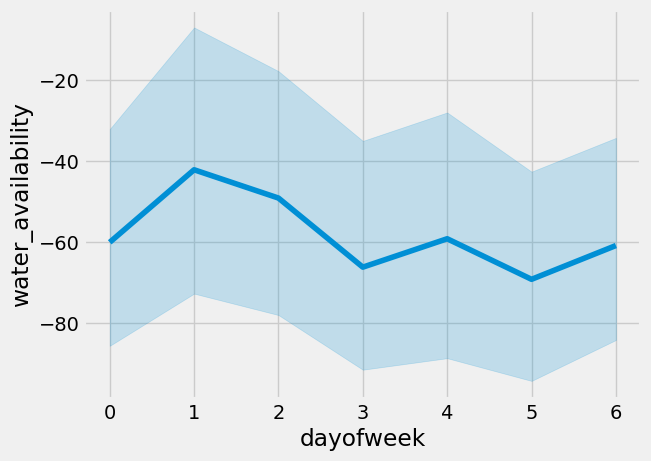

In [28]:
sns.lineplot(x="dayofweek",y="water_availability",data=train_data1)

<AxesSubplot:xlabel='month', ylabel='water_availability'>

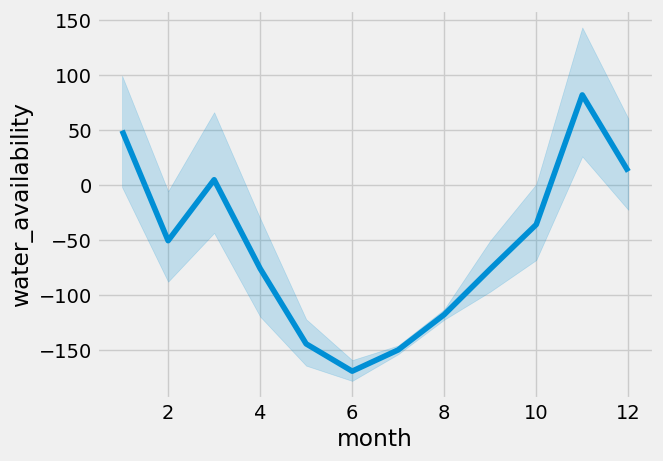

In [29]:
sns.lineplot(x="month",y="water_availability",data=train_data1)

<AxesSubplot:xlabel='year', ylabel='water_availability'>

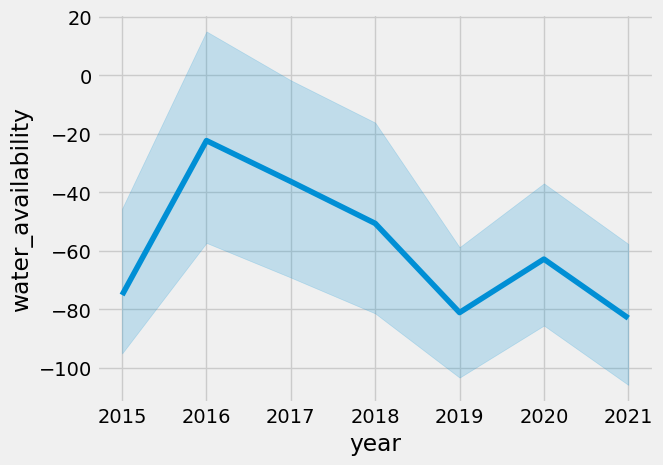

In [30]:
sns.lineplot(x="year",y="water_availability",data=train_data1)

In [31]:
train_data1["year"]

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
2445    2021
2446    2021
2447    2021
2448    2021
2449    2021
Name: year, Length: 2450, dtype: int64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

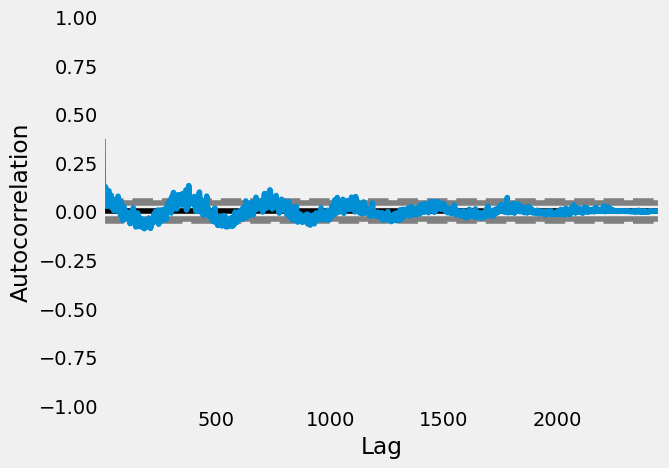

In [32]:
autocorrelation_plot(train_data1["water_availability"])

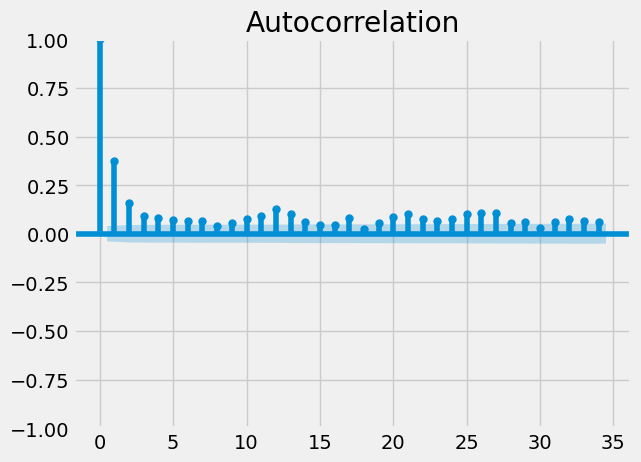

In [33]:
plot_acf(train_data1["water_availability"])
plt.show()

E:\python\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



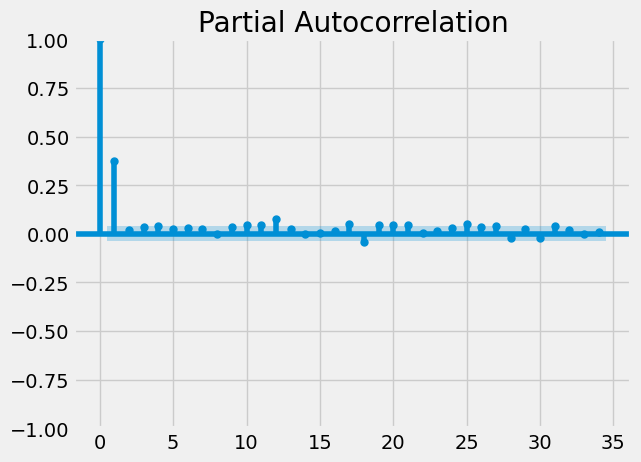

In [34]:
plot_pacf(train_data1["water_availability"])
plt.show()

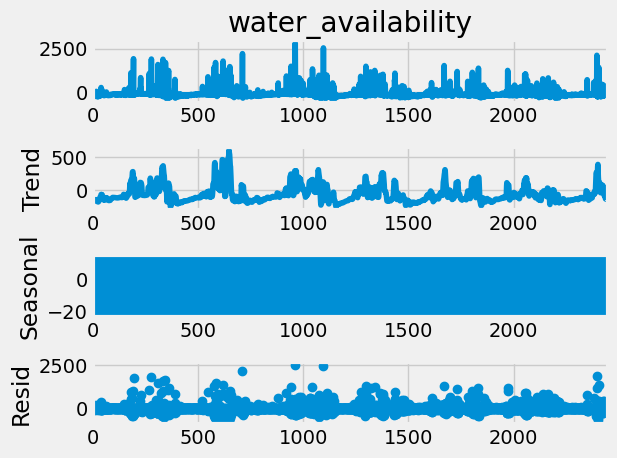

In [35]:
decomposition=seasonal_decompose(train_data1["water_availability"],model='additive',period=12)
decomposition.plot()
plt.show()

In [36]:
dftest = adfuller(train_data1.water_availability, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.907712598996755
2. P-Value :  2.6840456217595323e-07
3. Num Of Lags :  26
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2423
5. Critical Values :
	 1% :  -3.433051709164412
	 5% :  -2.862733584086091
	 10% :  -2.5674053938533405


In [37]:
data_diff=train_data1["water_availability"].diff(periods=24)

In [38]:
dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -13.140481574911126
2. P-Value :  1.4327978325496152e-24
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2401
5. Critical Values :
	 1% :  -3.43307649105898
	 5% :  -2.8627445274375276
	 10% :  -2.567411220295375


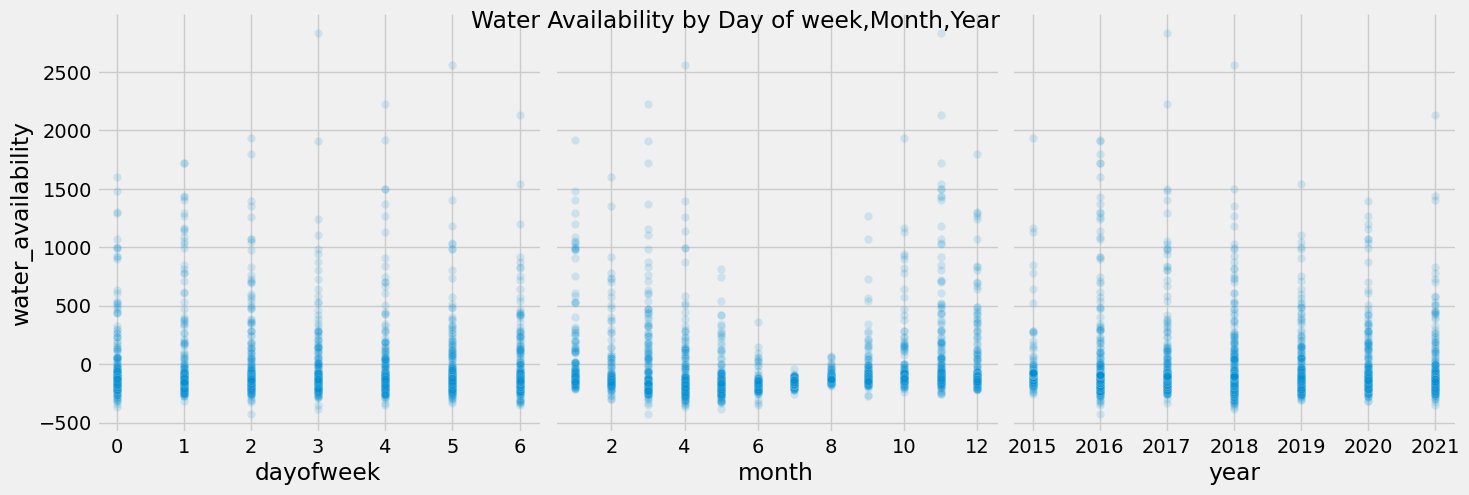

In [39]:
sns.pairplot(train_data1.dropna(),x_vars=['dayofweek','month','year'],
            y_vars="water_availability",
            height=5,
            plot_kws={"alpha":0.15,"linewidth":0.25})
plt.suptitle("Water Availability by Day of week,Month,Year")
plt.show()

### Model Development

In [40]:
# Formatting data for prophet model using ds and y
train_data1.rename(columns={"date":"ds","water_availability":"y"}).head()

ds  precipitation_sum (mm)  temperature_2m_above_ground  \
0 2015-04-01                     0.0                    11.984259   
1 2015-04-02                     0.0                    12.426162   
2 2015-04-03                     0.0                    13.183237   
3 2015-04-04                     0.0                    12.117507   
4 2015-04-05                     0.0                    11.775280   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.007020                          79.653691   
1                           0.006639                          73.369087   
2                           0.007103                          73.648926   
3                           0.006628                          74.249417   
4                           0.006604                          75.414558   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                             -1.008622                             -1.247756   
1                             -0.882894                             -0.674852   
2                             -0.554821                             -0.975509   
3                             -0.762048                             -1.315288   
4                             -1.970064                             -1.730378   

   precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                             11.792043                     0.000000   
1                             10.580860                     0.000000   
2                             13.224449                     0.000000   
3                             11.899657                     0.000000   
4                             13.397951                     0.015292   

   ACond_tavg  ...  SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  \
0    0.023497  ...         238.455282          4.762528       0.0  217.475818   
1    0.032284  ...         236.761384          4.734760       0.0  214.612400   
2    0.021108  ...         235.312021          4.710264       0.0  215.533733   
3    0.022526  ...         234.026542          4.696759       0.0  202.458474   
4    0.027819  ...         232.774424          4.638155       0.0  222.788846   

   TVeg_tavg    TWS_tavg           y  dayofweek  month  year  
0   0.000013  935.769155 -200.341947          2      4  2015  
1   0.000010  933.421715 -173.229781          3      4  2015  
2   0.000011  931.213284 -175.856488          4      4  2015  
3   0.000009  929.092368 -164.456208          5      4  2015  
4   0.000011  926.930220 -186.252044          6      4  2015  

[5 rows x 36 columns]

In [41]:
# Setup train model and fit
model=Prophet(interval_width=0.95)
model.fit(train_data1.rename(columns={"date":"ds","water_availability":"y"}))

07:54:42 - cmdstanpy - INFO - Chain [1] start processing
07:54:43 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
data_forecast=model.predict(df=test_data1.rename(columns={'date':'ds'}))

The predict method will assign each row in future a predicted value which it names yhat.The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [43]:
data_forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
540 2023-06-26 -96.652384 -722.662795  293.145452  -100.793900   -92.822260   
541 2023-06-27 -96.674487 -712.546212  334.387101  -100.826878   -92.834559   
542 2023-06-28 -96.696591 -732.042292  309.731002  -100.859857   -92.846858   
543 2023-06-29 -96.718694 -750.625192  287.525382  -100.892835   -92.859158   
544 2023-06-30 -96.740798 -766.501525  267.087892  -100.925814   -92.871457   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
540     -130.479540           -130.479540           -130.479540  -1.869068   
541     -112.641493           -112.641493           -112.641493  15.986923   
542     -119.526094           -119.526094           -119.526094   8.702723   
543     -135.375796           -135.375796           -135.375796  -7.965803   
544     -127.390637           -127.390637           -127.390637  -1.211194   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
540     -1.869068     -1.869068 -128.610472   -128.610472   -128.610472   
541     15.986923     15.986923 -128.628415   -128.628415   -128.628415   
542      8.702723      8.702723 -128.228817   -128.228817   -128.228817   
543     -7.965803     -7.965803 -127.409993   -127.409993   -127.409993   
544     -1.211194     -1.211194 -126.179444   -126.179444   -126.179444   

     multiplicative_terms  multiplicative_terms_lower  \
540                   0.0                         0.0   
541                   0.0                         0.0   
542                   0.0                         0.0   
543                   0.0                         0.0   
544                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
540                         0.0 -227.131924  
541                         0.0 -209.315980  
542                         0.0 -216.222685  
543                         0.0 -232.094491  
544                         0.0 -224.131435

In [44]:
data_forecast.shape

(545, 19)

In [45]:
data_forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2022-01-01 -84.694351 -548.594121  532.884035   -84.694351   -84.694351   
1   2022-01-02 -84.716455 -564.742182  511.383308   -84.716455   -84.716455   
2   2022-01-03 -84.738558 -494.807321  572.841345   -84.738558   -84.738558   
3   2022-01-04 -84.760662 -498.549690  563.534618   -84.760662   -84.760662   
4   2022-01-05 -84.782765 -513.831988  498.568407   -84.782795   -84.782765   
..         ...        ...         ...         ...          ...          ...   
540 2023-06-26 -96.652384 -722.662795  293.145452  -100.793900   -92.822260   
541 2023-06-27 -96.674487 -712.546212  334.387101  -100.826878   -92.834559   
542 2023-06-28 -96.696591 -732.042292  309.731002  -100.859857   -92.846858   
543 2023-06-29 -96.718694 -750.625192  287.525382  -100.892835   -92.859158   
544 2023-06-30 -96.740798 -766.501525  267.087892  -100.925814   -92.871457   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0         61.518430             61.518430             61.518430 -10.972306   
1         75.136626             75.136626             75.136626  -2.671275   
2         81.536870             81.536870             81.536870  -1.869068   
3        105.187804            105.187804            105.187804  15.986923   
4        103.804827            103.804827            103.804827   8.702723   
..              ...                   ...                   ...        ...   
540     -130.479540           -130.479540           -130.479540  -1.869068   
541     -112.641493           -112.641493           -112.641493  15.986923   
542     -119.526094           -119.526094           -119.526094   8.702723   
543     -135.375796           -135.375796           -135.375796  -7.965803   
544     -127.390637           -127.390637           -127.390637  -1.211194   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      -10.972306    -10.972306   72.490735     72.490735     72.490735   
1       -2.671275     -2.671275   77.807901     77.807901     77.807901   
2       -1.869068     -1.869068   83.405939     83.405939     83.405939   
3       15.986923     15.986923   89.200882     89.200882     89.200882   
4        8.702723      8.702723   95.102104     95.102104     95.102104   
..            ...           ...         ...           ...           ...   
540     -1.869068     -1.869068 -128.610472   -128.610472   -128.610472   
541     15.986923     15.986923 -128.628415   -128.628415   -128.628415   
542      8.702723      8.702723 -128.228817   -128.228817   -128.228817   
543     -7.965803     -7.965803 -127.409993   -127.409993   -127.409993   
544     -1.211194     -1.211194 -126.179444   -126.179444   -126.179444   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
540                   0.0                         0.0   
541                   0.0                         0.0   
542                   0.0                         0.0   
543                   0.0                         0.0   
544                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  -23.175921  
1                           0.0   -9.579829  
2                           0.0   -3.201688  
3                           0.0   20.427143  
4                           0.0   19.022061  
..                          ...         ...  
540                         0.0 -227.131924  
541                         0.0 -209.315980  
542                         0.0 -216.222685  
543                         0.0 -232.094491  
544                         0.0 -2

#### Plot of Forecast

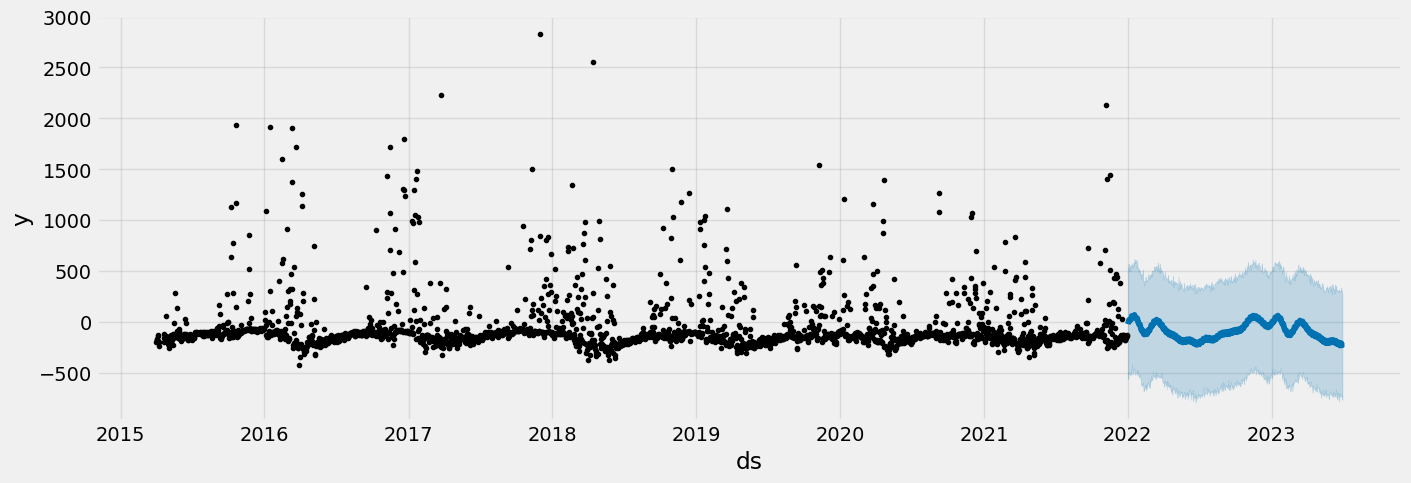

In [46]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_forecast,ax=ax)
plt.show()

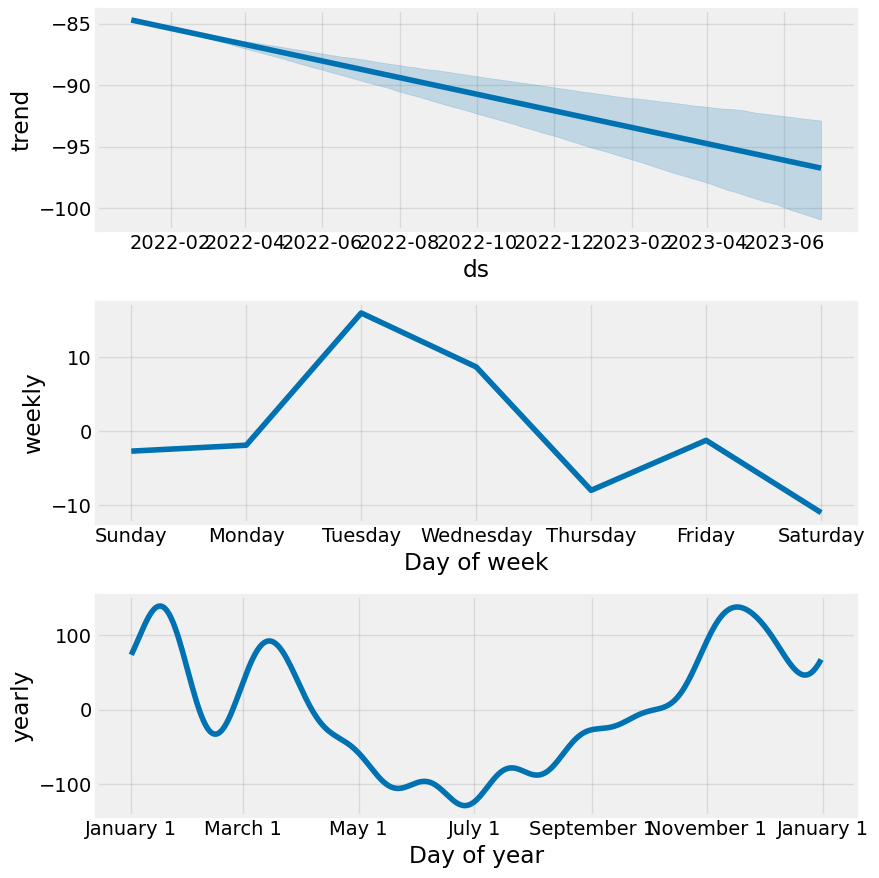

In [47]:
fig=model.plot_components(data_forecast)

In [48]:
plot_plotly(model,data_forecast)

In [49]:
plot_components_plotly(model, data_forecast)

### Comparing Forecast to Actuals

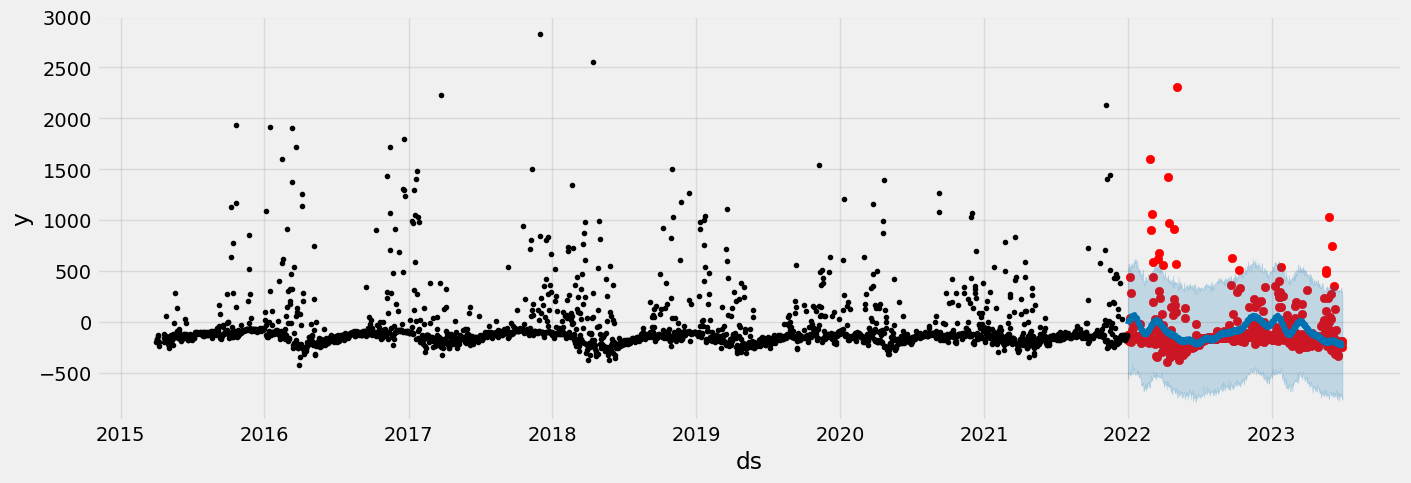

In [50]:
# Plot for the forecast with Actuals
f,ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_data1.date, test_data1['water_availability'], color='r')
fig = model.plot(data_forecast,ax=ax)

In [51]:
test_data1.shape

(545, 36)

In [52]:
data_forecast.shape

(545, 19)

### First Month Predictions

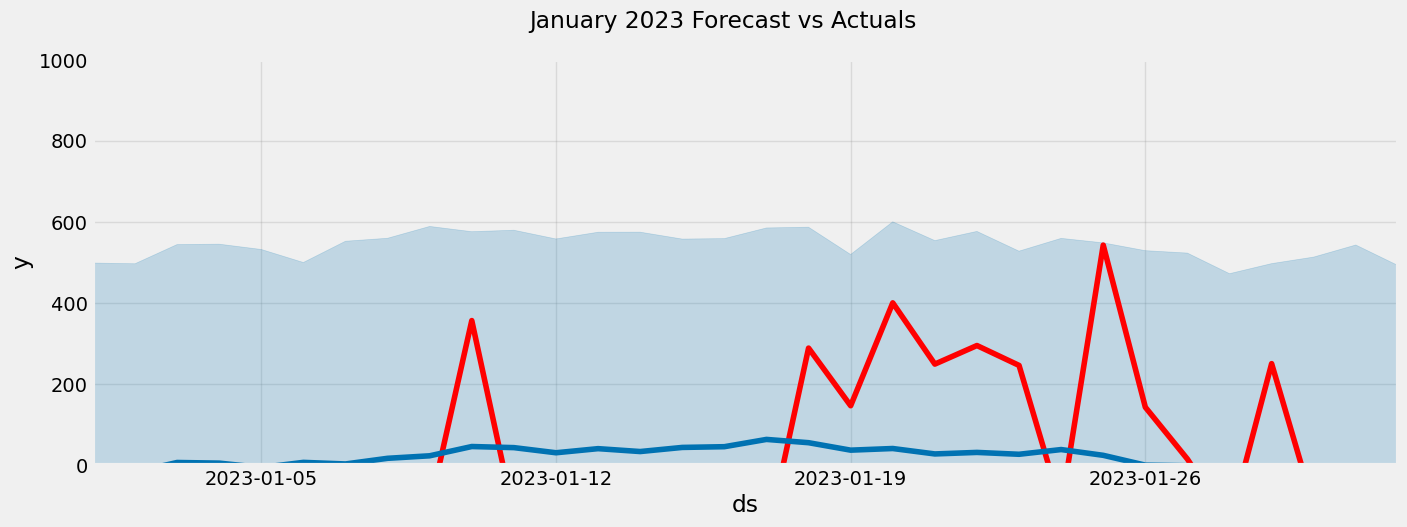

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(test_data1.date, test_data1['water_availability'], color='r')
fig = model.plot(data_forecast, ax=ax)
ax.set_xbound(lower='2023-01-01',
              upper='2023-02-01')

ax.set_ylim(0, 1000)

plot = plt.suptitle('January 2023 Forecast vs Actuals')

### Single Week Predictions

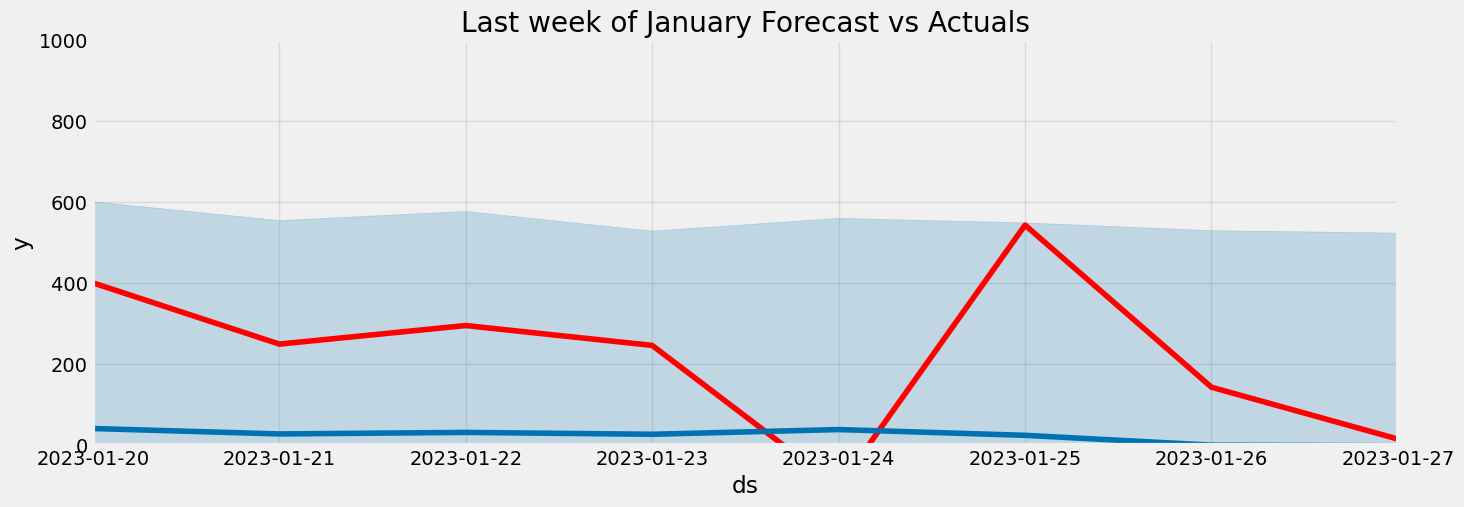

In [54]:
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(test_data1.date, test_data1['water_availability'], color='r')
fig = model.plot(data_forecast, ax=ax)
ax.set_xbound(lower='2023-01-20', upper='2023-01-27')
ax.set_ylim(0, 1000)
ax.set_title('Last week of January Forecast vs Actuals')
plt.show()

### Saturating Forecasts

#### Forecasting Growth

    Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point.This is called the carrying capacity, and the forecast should saturate at this point.
    Prophet allows to make forecasts using a logistic growth trend model, with a specified carrying capacity.We must specify  the carrying apacity in a column "cap".


In [59]:
train_data1["cap"]=6

In [60]:
train_data1.head()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
0 2015-04-01                     0.0                    11.984259   
1 2015-04-02                     0.0                    12.426162   
2 2015-04-03                     0.0                    13.183237   
3 2015-04-04                     0.0                    12.117507   
4 2015-04-05                     0.0                    11.775280   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.007020                          79.653691   
1                           0.006639                          73.369087   
2                           0.007103                          73.648926   
3                           0.006628                          74.249417   
4                           0.006604                          75.414558   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                             -1.008622                             -1.247756   
1                             -0.882894                             -0.674852   
2                             -0.554821                             -0.975509   
3                             -0.762048                             -1.315288   
4                             -1.970064                             -1.730378   

   precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                             11.792043                     0.000000   
1                             10.580860                     0.000000   
2                             13.224449                     0.000000   
3                             11.899657                     0.000000   
4                             13.397951                     0.015292   

   ACond_tavg  ...  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
0    0.023497  ...          4.762528       0.0  217.475818   0.000013   
1    0.032284  ...          4.734760       0.0  214.612400   0.000010   
2    0.021108  ...          4.710264       0.0  215.533733   0.000011   
3    0.022526  ...          4.696759       0.0  202.458474   0.000009   
4    0.027819  ...          4.638155       0.0  222.788846   0.000011   

     TWS_tavg  water_availability  dayofweek  month  year  cap  
0  935.769155         -200.341947          2      4  2015    6  
1  933.421715         -173.229781          3      4  2015    6  
2  931.213284         -175.856488          4      4  2015    6  
3  929.092368         -164.456208          5      4  2015    6  
4  926.930220         -186.252044          6      4  2015    6  

[5 rows x 37 columns]

In [61]:
train_data1.to_csv('new_train_data.csv')

In [62]:
cap_train_data=pd.read_csv("new_train_data.csv",parse_dates=['ds'])
cap_train_data.head()

Unnamed: 0         ds  precipitation_sum (mm)  temperature_2m_above_ground  \
0           0 2015-04-01                     0.0                    11.984259   
1           1 2015-04-02                     0.0                    12.426162   
2           2 2015-04-03                     0.0                    13.183237   
3           3 2015-04-04                     0.0                    12.117507   
4           4 2015-04-05                     0.0                    11.775280   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.007020                          79.653691   
1                           0.006639                          73.369087   
2                           0.007103                          73.648926   
3                           0.006628                          74.249417   
4                           0.006604                          75.414558   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                             -1.008622                             -1.247756   
1                             -0.882894                             -0.674852   
2                             -0.554821                             -0.975509   
3                             -0.762048                             -1.315288   
4                             -1.970064                             -1.730378   

   precipitable_water_entire_atmosphere  total_precipitation_surface  ...  \
0                             11.792043                     0.000000  ...   
1                             10.580860                     0.000000  ...   
2                             13.224449                     0.000000  ...   
3                             11.899657                     0.000000  ...   
4                             13.397951                     0.015292  ...   

   SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg    TWS_tavg           y  \
0          4.762528       0.0  217.475818   0.000013  935.769155 -200.341947   
1          4.734760       0.0  214.612400   0.000010  933.421715 -173.229781   
2          4.710264       0.0  215.533733   0.000011  931.213284 -175.856488   
3          4.696759       0.0  202.458474   0.000009  929.092368 -164.456208   
4          4.638155       0.0  222.788846   0.000011  926.930220 -186.252044   

   dayofweek  month  year  cap  
0          2      4  2015    6  
1          3      4  2015    6  
2          4      4  2015    6  
3          5      4  2015    6  
4          6      4  2015    6  

[5 rows x 38 columns]

In [63]:
cap_train_data.drop(columns="Unnamed: 0")

ds  precipitation_sum (mm)  temperature_2m_above_ground  \
0    2015-04-01                     0.0                    11.984259   
1    2015-04-02                     0.0                    12.426162   
2    2015-04-03                     0.0                    13.183237   
3    2015-04-04                     0.0                    12.117507   
4    2015-04-05                     0.0                    11.775280   
...         ...                     ...                          ...   
2445 2021-12-26                     0.4                    16.287671   
2446 2021-12-27                     0.0                    15.364401   
2447 2021-12-28                     0.0                    15.230325   
2448 2021-12-29                     0.0                    15.254436   
2449 2021-12-30                     0.0                    14.979386   

      specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                              0.007020                          79.653691   
1                              0.006639                          73.369087   
2                              0.007103                          73.648926   
3                              0.006628                          74.249417   
4                              0.006604                          75.414558   
...                                 ...                                ...   
2445                           0.007353                          64.745201   
2446                           0.007059                          65.617104   
2447                           0.006617                          62.344394   
2448                           0.006148                          58.465583   
2449                           0.005950                          57.813201   

      u_component_of_wind_10m_above_ground  \
0                                -1.008622   
1                                -0.882894   
2                                -0.554821   
3                                -0.762048   
4                                -1.970064   
...                                    ...   
2445                              1.852457   
2446                              1.496906   
2447                              0.348704   
2448                              0.088050   
2449                              0.323049   

      v_component_of_wind_10m_above_ground  \
0                                -1.247756   
1                                -0.674852   
2                                -0.975509   
3                                -1.315288   
4                                -1.730378   
...                                    ...   
2445                              0.836797   
2446                              0.156879   
2447                              0.345577   
2448                              0.232945   
2449                              0.204321   

      precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                                11.792043                     0.000000   
1                                10.580860                     0.000000   
2                                13.224449                     0.000000   
3                                11.899657                     0.000000   
4                                13.397951                     0.015292   
...                                    ...                          ...   
2445                             16.381304                     0.087708   
2446                             14.250724                     0.231606   
2447                             13.050149                     0.273704   
2448                             12.067519                     0.432374   
2449                             11.322365                     0.361492   

      ACond_tavg  ...  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
0       0.023497  ...          4.762528       0.0  217.475818   0.000013   
1       0.032284  ...          4.734760       0.0  2

In [64]:
model=Prophet(growth="logistic")
model.fit(cap_train_data)

08:00:04 - cmdstanpy - INFO - Chain [1] start processing
08:00:04 - cmdstanpy - INFO - Chain [1] done processing


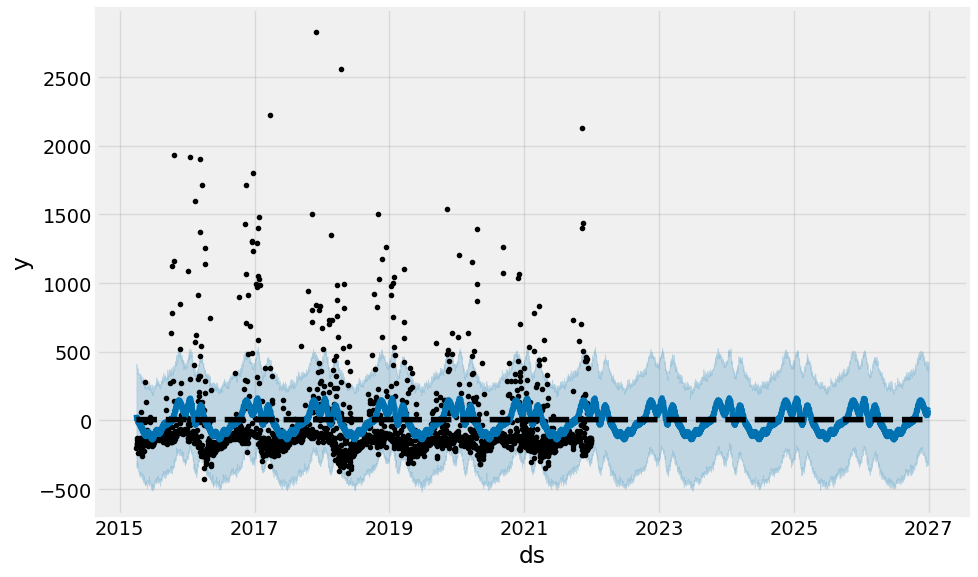

In [65]:
data_future = model.make_future_dataframe(periods=1826)# 5 years 
data_future['cap'] = 6
fcst = model.predict(data_future)
fig = model.plot(fcst)

### Saturating Minimum

The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum

08:00:44 - cmdstanpy - INFO - Chain [1] start processing
08:00:45 - cmdstanpy - INFO - Chain [1] done processing


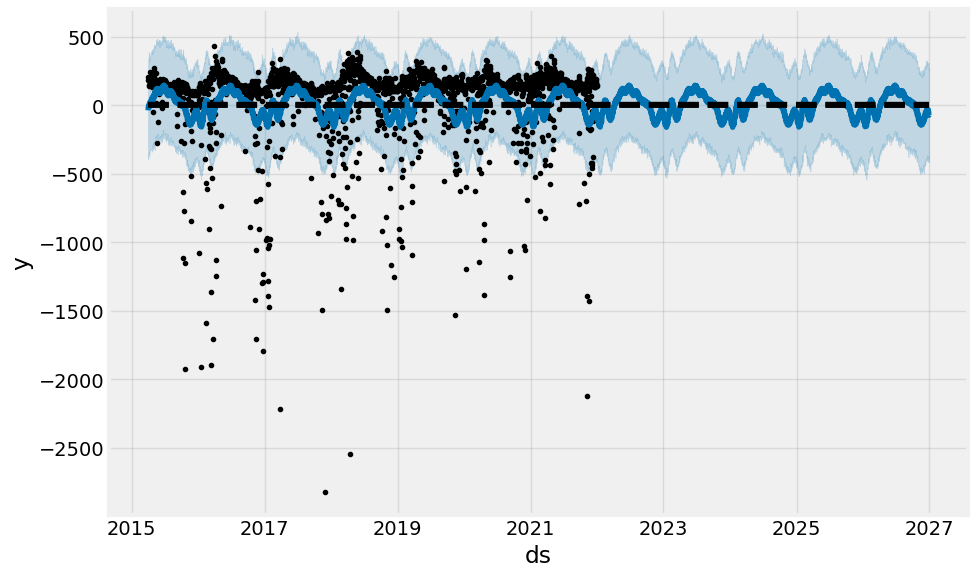

In [66]:
cap_train_data['y'] = 10- cap_train_data['y']
cap_train_data['cap'] = 5.5
cap_train_data['floor'] = 1.5
data_future['cap'] = 5.5
data_future['floor'] = 1.5
model = Prophet(growth='logistic')
model.fit(cap_train_data)
fcst = model.predict(data_future)
fig = model.plot(fcst)

To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified

### Trend Changepoints

    Changepoints are the datetime points where the time series have abrupt changes in the trajectory.By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.
    
###   Automatic changepoint detection in Prophet

  
  *Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
  *By default, Prophet adds 25 changepoints to the initial 80% of the data-set.
  

In [69]:
model.changepoints

78     2015-06-28
157    2015-09-15
235    2015-12-02
313    2016-02-19
392    2016-05-08
470    2016-07-25
549    2016-10-12
627    2016-12-29
705    2017-03-18
784    2017-06-05
862    2017-08-22
940    2017-11-08
1019   2018-01-27
1097   2018-04-15
1175   2018-07-02
1254   2018-09-19
1332   2018-12-06
1410   2019-02-23
1489   2019-05-13
1567   2019-07-30
1646   2019-10-17
1724   2020-01-04
1802   2020-03-22
1881   2020-06-09
1959   2020-08-26
Name: ds, dtype: datetime64[ns]

In [71]:
cap_train_data.drop(columns="Unnamed: 0")

ds  precipitation_sum (mm)  temperature_2m_above_ground  \
0    2015-04-01                     0.0                    11.984259   
1    2015-04-02                     0.0                    12.426162   
2    2015-04-03                     0.0                    13.183237   
3    2015-04-04                     0.0                    12.117507   
4    2015-04-05                     0.0                    11.775280   
...         ...                     ...                          ...   
2445 2021-12-26                     0.4                    16.287671   
2446 2021-12-27                     0.0                    15.364401   
2447 2021-12-28                     0.0                    15.230325   
2448 2021-12-29                     0.0                    15.254436   
2449 2021-12-30                     0.0                    14.979386   

      specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                              0.007020                          79.653691   
1                              0.006639                          73.369087   
2                              0.007103                          73.648926   
3                              0.006628                          74.249417   
4                              0.006604                          75.414558   
...                                 ...                                ...   
2445                           0.007353                          64.745201   
2446                           0.007059                          65.617104   
2447                           0.006617                          62.344394   
2448                           0.006148                          58.465583   
2449                           0.005950                          57.813201   

      u_component_of_wind_10m_above_ground  \
0                                -1.008622   
1                                -0.882894   
2                                -0.554821   
3                                -0.762048   
4                                -1.970064   
...                                    ...   
2445                              1.852457   
2446                              1.496906   
2447                              0.348704   
2448                              0.088050   
2449                              0.323049   

      v_component_of_wind_10m_above_ground  \
0                                -1.247756   
1                                -0.674852   
2                                -0.975509   
3                                -1.315288   
4                                -1.730378   
...                                    ...   
2445                              0.836797   
2446                              0.156879   
2447                              0.345577   
2448                              0.232945   
2449                              0.204321   

      precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                                11.792043                     0.000000   
1                                10.580860                     0.000000   
2                                13.224449                     0.000000   
3                                11.899657                     0.000000   
4                                13.397951                     0.015292   
...                                    ...                          ...   
2445                             16.381304                     0.087708   
2446                             14.250724                     0.231606   
2447                             13.050149                     0.273704   
2448                             12.067519                     0.432374   
2449                             11.322365                     0.361492   

      ACond_tavg  ...  SWE_tavg  Swnet_tavg  TVeg_tavg    TWS_tavg  \
0       0.023497  ...       0.0  217.475818   0.000013  935.769155   
1       0.032284  ...       0.0  214.612400   0.000010  933.4217

In [76]:
#def mean_absolute_percentage_error(y_true, y_pred): 
 #   """Calculates MAPE given y_true and y_pred"""
  #  y_true, y_pred = np.array(y_true), np.array(y_pred)
   # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mean_absolute_percentage_error(y_true=test_data1['water_availability'],
 #                  y_pred=data_forecast['yhat'])

### Cross Validation

    Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point.We can then compare the forecasted values to the actual values.

Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 450 days(365+90) of training data in the first cutoff and then making predictions every 180 days.

In [72]:
df_cv = cross_validation(model=model, initial='455 days', period='90 days', horizon = '365 days',parallel='processes')


In [73]:
# cross validated dataframe
df_cv.head()

ds       yhat  yhat_lower  yhat_upper           y     cutoff
0 2016-07-25  97.618683 -249.937583  424.598317  134.842527 2016-07-24
1 2016-07-26   0.423070 -351.923442  336.880405  156.395569 2016-07-24
2 2016-07-27  62.215704 -288.543179  412.155886  168.966997 2016-07-24
3 2016-07-28  66.968132 -239.396261  392.335505  145.647032 2016-07-24
4 2016-07-29  38.293150 -301.971902  370.731594  145.064383 2016-07-24

In [74]:
#cutoff = pd.to_datetime(['2019-01-24', '2019-06-26', '2020-01-26'])
#cutoff = pd.date_range(start='2019-01-01', end='2020-06-01', freq='1MS')
#df_cv2 = cross_validation(model, cutoffs=cutoff, horizon='365 days')


#### Performance Metrics

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates.These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff)

In [75]:
df_p = performance_metrics(df_cv,rolling_window=1)
df_p.head()

horizon           mse        rmse         mae      mape     mdape  \
0 365 days  77773.276736  278.878606  185.300029  1.398795  0.853505   

      smape  coverage  
0  1.277198  0.927704

##### Performance Metric value

In [76]:
df_p['mape'].values[0]

1.3987949823836288

### Visualization of Cross Validation Performance


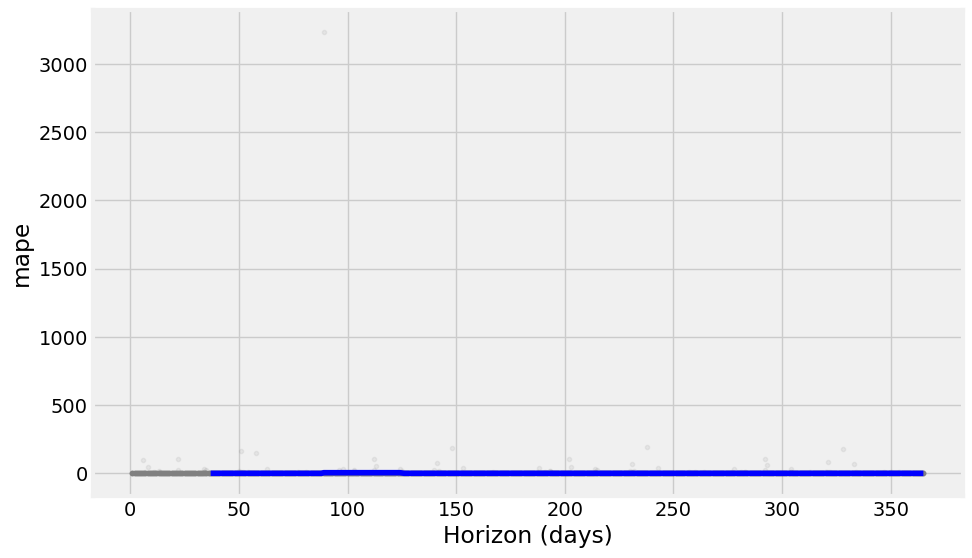

In [437]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

#### Hyperparameter Tuning 

In [77]:
# Initiate the model
manual_model=Prophet(changepoint_range=0.9)

#Fit the model on training data
manual_model.fit(cap_train_data)

#Cross Validation
manual_model_cv=cross_validation(manual_model,initial='455 days', period='90 days', horizon = '365 days',parallel='processes')


#Model Performance Metrics
manual_model_p=performance_metrics(manual_model_cv,rolling_window=1)
manual_model_p['mape'].values[0]



08:07:37 - cmdstanpy - INFO - Chain [1] start processing
08:07:38 - cmdstanpy - INFO - Chain [1] done processing


1.160615669474759

### Automatic hyper parameter tuning


In [78]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode':['additive']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

mapes = []  # Created a list to store MAPE values for each combinations


# Use cross validation to evaluate all parameters
for params in all_params:
    auto_model = Prophet(**params).fit(cap_train_data)# Fit model with given params
    #cross-validation
    df_cv1 = cross_validation(auto_model,initial='455 days', period='90 days', horizon = '365 days',parallel='processes')
    #model perfomance
    df_p1 = performance_metrics(df_cv1, rolling_window=1)
    #Save model performance metrics
    mapes.append(df_p1['mape'].values[0])
   

#Tuning results

tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes

#find the best parameters
best_params=all_params[np.argmin(mapes)]
print(best_params)

08:08:06 - cmdstanpy - INFO - Chain [1] start processing
08:08:06 - cmdstanpy - INFO - Chain [1] done processing
08:08:22 - cmdstanpy - INFO - Chain [1] start processing
08:08:23 - cmdstanpy - INFO - Chain [1] done processing
08:08:38 - cmdstanpy - INFO - Chain [1] start processing
08:08:38 - cmdstanpy - INFO - Chain [1] done processing
08:08:53 - cmdstanpy - INFO - Chain [1] start processing
08:08:54 - cmdstanpy - INFO - Chain [1] done processing
08:09:09 - cmdstanpy - INFO - Chain [1] start processing
08:09:10 - cmdstanpy - INFO - Chain [1] done processing
08:09:27 - cmdstanpy - INFO - Chain [1] start processing
08:09:28 - cmdstanpy - INFO - Chain [1] done processing
08:09:44 - cmdstanpy - INFO - Chain [1] start processing
08:09:45 - cmdstanpy - INFO - Chain [1] done processing
08:10:01 - cmdstanpy - INFO - Chain [1] start processing
08:10:01 - cmdstanpy - INFO - Chain [1] done processing
08:10:17 - cmdstanpy - INFO - Chain [1] start processing
08:10:17 - cmdstanpy - INFO - Chain [1]

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [79]:
# Fit the model using best parameters
new_model=Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                  seasonality_prior_scale=best_params['seasonality_prior_scale'],
                  seasonality_mode=best_params['seasonality_mode'])
#Fit the model on training dataset
new_model.fit(cap_train_data)

#Cross Validation
new_model_cv=cross_validation(new_model,initial='455 days', period='90 days', horizon = '365 days',parallel='processes')

#Model performance matrics
new_model_p=performance_metrics(new_model_cv,rolling_window=1)
new_model_p['mape'].values[0]

08:13:01 - cmdstanpy - INFO - Chain [1] start processing
08:13:02 - cmdstanpy - INFO - Chain [1] done processing


1.0738287869376666

In [80]:
new_data_forecast=new_model.predict(df=test_data1.rename(columns={'date':'ds'}))

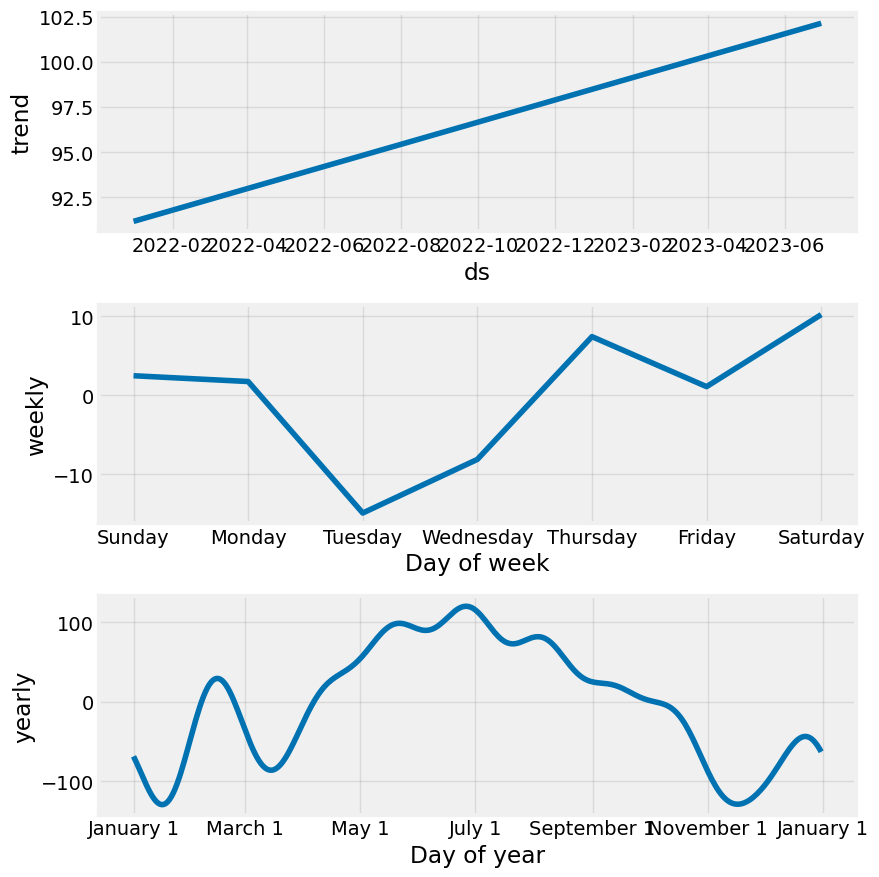

In [81]:
fig=new_model.plot_components(new_data_forecast)